## Лабораторная работа 5. Математичекая морфология

### Патракова Екатерина, РИМ-181226

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_int, img_as_ubyte
from skimage.color import rgb2gray
from numpy import dstack, roll, clip
from numpy import histogram
import numpy as np
from skimage.morphology import closing, opening,\
                                binary_closing, binary_opening,\
                                binary_erosion, binary_dilation,\
                                erosion, dilation, \
                                diamond, disk, rectangle, square, star
import matplotlib.pyplot as plt
import io

%matplotlib inline

In [2]:
def plot_imgs(imgs, names):
    plt.figure(figsize=(15,8))
    for i in range(len(imgs)):
        plt.subplot(1, len(imgs), i+1)
        plt.imshow(imgs[i], cmap='gray')
        plt.title(names[i])

## Найти внутренние и внешние границы изображений 1 – 3 (шум удалить).

In [6]:
def get_img(img):
    no_noize = dilation(erosion(img, disk(3)),  disk(2))
    return no_noize, no_noize - erosion(img,  disk(3))

In [7]:
img1 = imread('imgs\\binary_imgs\\1.png', 1)
img2 = imread('imgs\\binary_imgs\\2.png', 1)
img3 = imread('imgs\\binary_imgs\\3.png', 1)

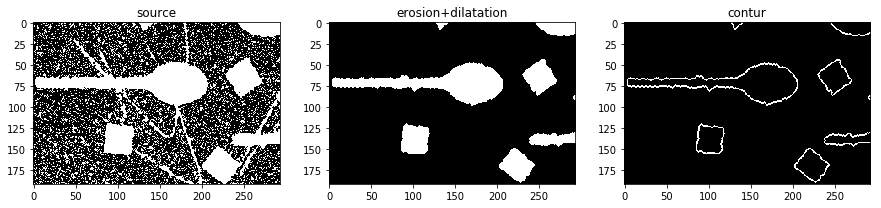

In [8]:
img1_wth_noize, img1_contur = get_img(img1)
plot_imgs([img1, img1_wth_noize, img1_contur], names=['source', 'erosion+dilatation', 'contur'])

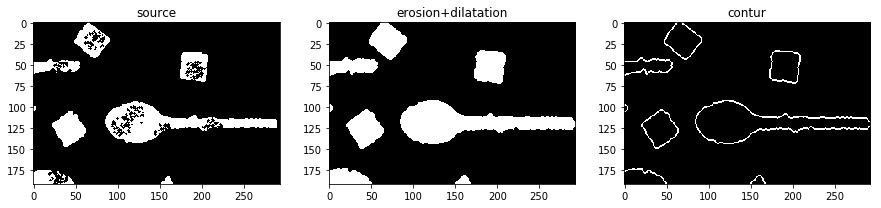

In [9]:
img2_wth_noize, img2_contur = get_img(dilation(img2, disk(3)))
plot_imgs([img2, img2_wth_noize, img2_contur], names=['source', 'erosion+dilatation', 'contur'])

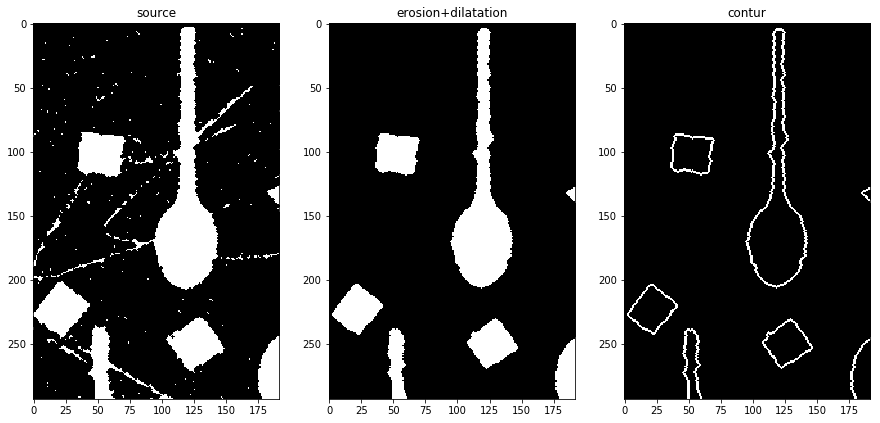

In [10]:
img3_wth_noize, img3_contur = get_img(img3)
plot_imgs([img3, img3_wth_noize, img3_contur], names=['source', 'erosion+dilatation', 'contur'])

## Удалить шум с изображений 4-6.

In [11]:
img4 = imread('imgs\\binary_imgs\\4.png', 1)
img5 = imread('imgs\\binary_imgs\\5.png', 1)
img6 = imread('imgs\\binary_imgs\\6.jpg', 1)

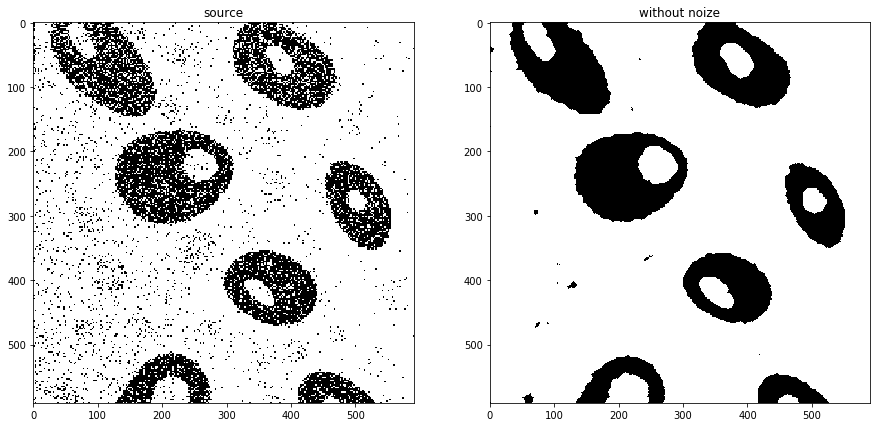

In [12]:
without_noize=dilation(erosion(opening(img4, disk(3))), disk(5))
plot_imgs([img4, without_noize], names=['source', 'without noize'])

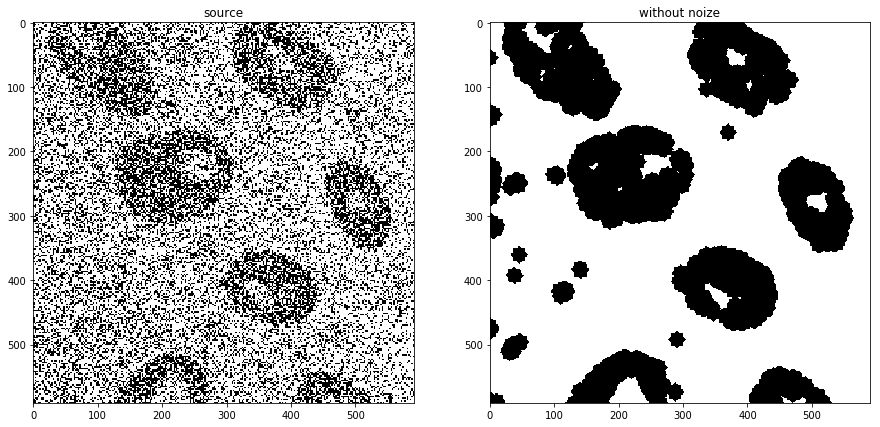

In [13]:
without_noize=closing(erosion(dilation(img5, diamond(2)), disk(10)), star(9))
plot_imgs([img5, without_noize], names=['source', 'without noize'])

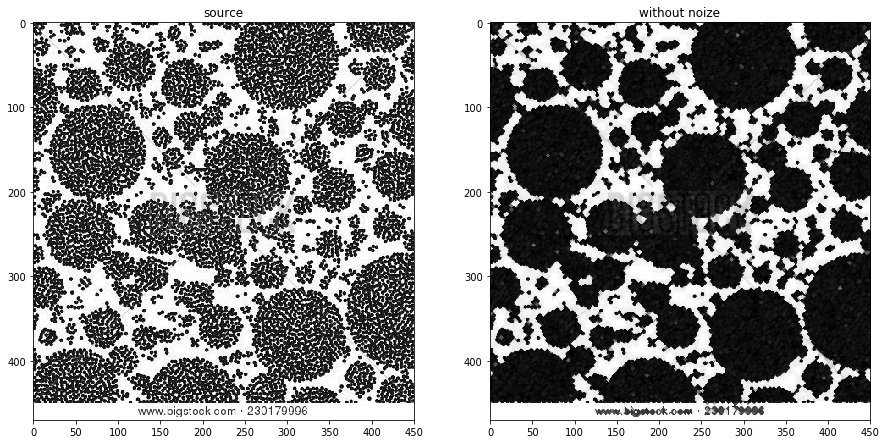

In [14]:
without_noize=dilation(erosion(img6, disk(2)), disk(2))
plot_imgs([img6, without_noize], names=['source', 'without noize'])

## Убрать шум с капч 7-9

In [15]:
img7 = imread('imgs\\binary_imgs\\7.png', 1)
img8 = imread('imgs\\binary_imgs\\8.png', 1)
img9 = imread('imgs\\binary_imgs\\9.png', 1)

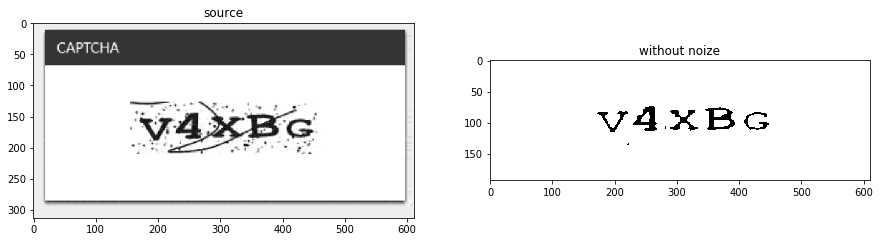

In [16]:
plot_imgs([img7, erosion(dilation(img7[70:-50, :]>0.8, square(5)))], names=['source', 'without noize'])

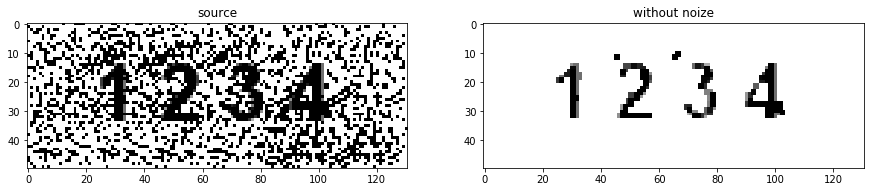

In [17]:
plot_imgs([img8, closing(dilation(img8, square(2)), square(2))], names=['source', 'without noize'])

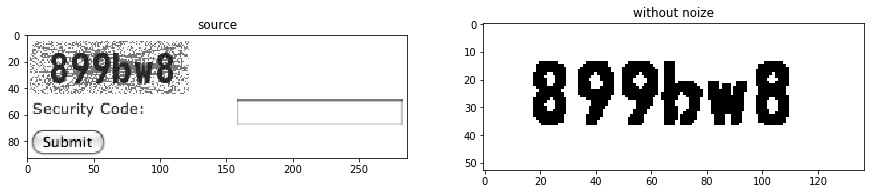

In [18]:
plot_imgs([img9, erosion(dilation(img9[:-40, :-150]>0.4), square(3))], names=['source', 'without noize'])

## Определить возраст дерева по спилу

In [7]:
img10 = imread('imgs\\binary_imgs\\10.jpg')
img11 = imread('imgs\\binary_imgs\\11.jpg')

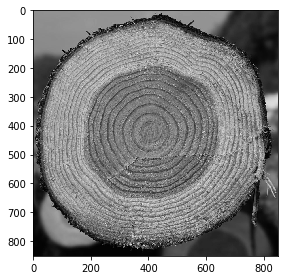

In [118]:
img10=rgb2gray(img10[:, 200:-150])
imshow(img10)

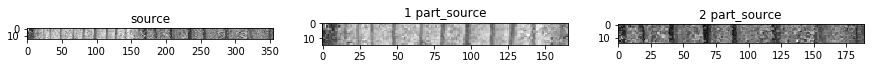

In [119]:
cut=img10[415:430, 25:380]
cut1=cut[:, :int(cut.shape[1]*0.47)]
cut2=cut[:, int(cut.shape[1]*0.47):]
plot_imgs([cut, cut1, cut2], ['source', '1 part_source', '2 part_source'])

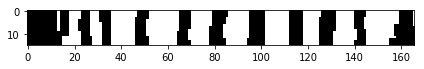

In [120]:
cut1=binary_erosion(binary_dilation(cut1>=0.59, rectangle(8, 1)), square(4))
imshow(cut1)

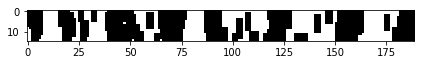

In [121]:
cut2=binary_erosion(binary_closing(cut2>=0.53, rectangle(6, 2)), rectangle(3,2))
imshow(cut2)

In [122]:
from numpy import hstack

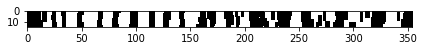

In [123]:
cut=hstack([cut1, cut2])
imshow(cut)

In [124]:
line = np.mean(cut, axis = 0)
cut = np.array([line]*15)

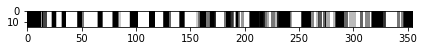

In [125]:
imshow(cut)

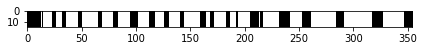

In [126]:
cut=binary_erosion(cut, square(1))
imshow(cut)

In [122]:
from itertools import groupby

In [128]:
groups = groupby(~cut[0], key=lambda key: key)
groups = np.array([[c, len(list(g))] for c, g in groups if c==1])

True и 1 - полосы

In [129]:
print("Возраст дерева = количество полос: ", len(groups)-1)
print("Максимальная ширина серии ", groups[1:, 1].max())

Возраст дерева = количество полос:  21
Максимальная ширина серии  10


In [130]:
cut.shape

(15, 355)

In [131]:
img10[415:430, 25:380]=cut

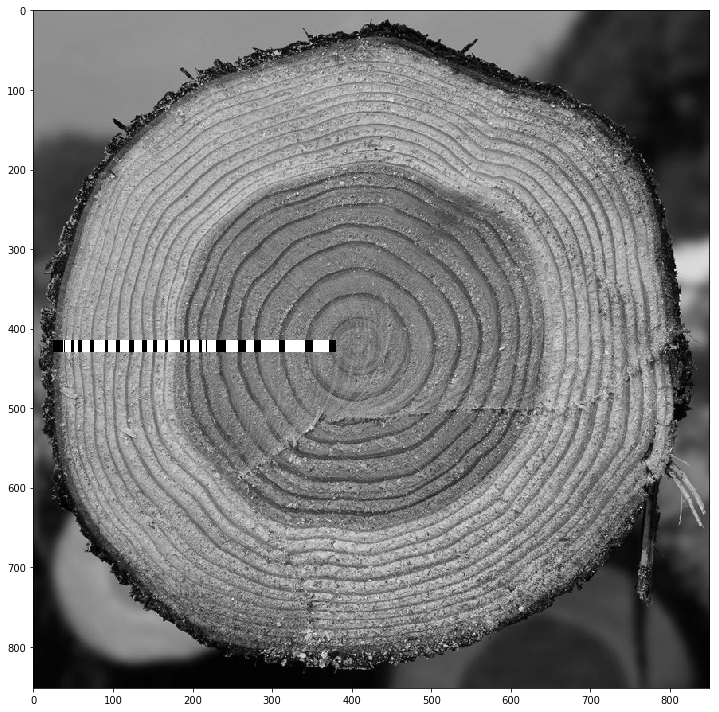

In [132]:
plt.figure(figsize=(10,10))
imshow(img10)

## img 11

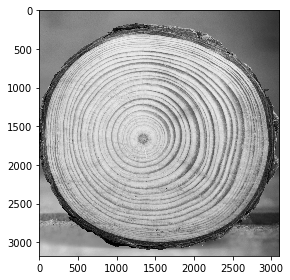

In [8]:
img11=rgb2gray(img11[:, 200:-150])
imshow(img11)

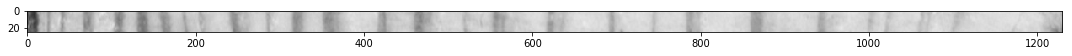

In [135]:
plt.figure(figsize=(15, 6))
cut=img11[1600:1625, 70:1300]
imshow(cut)

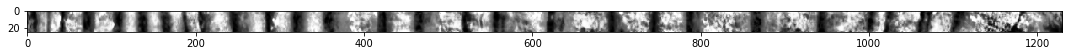

In [136]:
from skimage.filters import rank
cut=rank.equalize(cut, disk(25))
plt.figure(figsize=(15, 6))
imshow(cut)

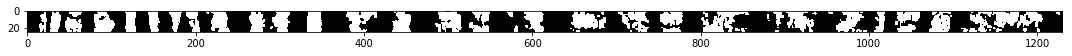

In [137]:
cut=binary_dilation(cut>=170, square(2))
plt.figure(figsize=(15, 6))
imshow(cut)

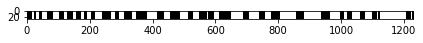

In [138]:
line = np.mean(cut, axis = 0)
cut = np.array([line]*25)
cut=binary_erosion(cut, disk(3))
imshow(cut)

In [139]:
groups = groupby(~cut[0], key=lambda key: key)
groups = np.array([[c, len(list(g))] for c, g in groups if c==1])

In [140]:
print("Возраст дерева = количество полос: ", len(groups)-1)
print("Максимальная ширина серии ", groups[1:, 1].max())

Возраст дерева = количество полос:  30
Максимальная ширина серии  37


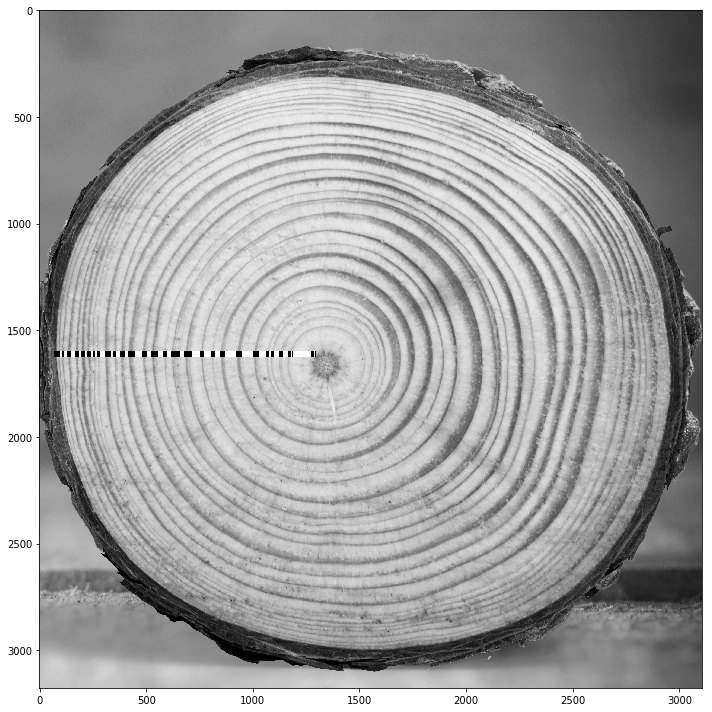

In [143]:
img11[1600:1625, 70:1300]=cut
plt.figure(figsize=(10, 10))
imshow(img11)